## ENSEMBLE METHODS/ADVANCED CLASSIFICATION PART 4 EXERCISE ANSWERS ##
#### Exercise ####
#### Task 1
##### Review the tasks that follow and import the packages required to complete them.
##### Set the working directory to data directory.
##### Load the dataset "bank_marketing.csv" from the data folder as 'data'.
##### The **bank marketing dataset** will be used to predict if a client has subscribed a term deposit
##### Similar to the credit card data, we will first predict using the demographic data (education, marital status, etc..)
##### Then, we will include social and economic attributes to predict the subscription of term deposit 
##### View the first few rows and column names of `bank`.
#### Result:


In [1]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
# Set 'main_dir' to location of the project folder

bank = pd.read_csv("bank_marketing.csv")
bank.head()
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Task 2
##### Check the data type of each variable.
##### Convert `y` into a categorical target variable.
##### Replace the column `y` in the dataframe, by setting it to 1 if `y` is 'yes', otherwise set `y` to 0.
#### Result:


In [2]:
# Check datatype
print(bank.dtypes)
# Convert y to 0/1 values
bank['y'] = np.where(bank ['y'] == 'yes',1,0 )
# Check for NAs.
print(bank.isnull().sum())


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed         int64
y                  object
dtype: object
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             1
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


#### Task 3
##### Look for NAs in `bank` and drop the columns with >50% NAs.
##### Check for NAs after again to make sure the data looks good.
##### Keep the numerical columns `age`,`campaign`,`emp_var_rate`,`cons_price_idx`,`cons_conf_idx`,`euribor3m`,`nr_employed`,`y`.
#### Result:


In [3]:
# Drop 'pdays'
bank.drop(['pdays'], axis = 1, inplace = True)
print(bank.shape)
bank = bank[["age","campaign","emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed","y"]]


(41188, 20)


#### Task 4
##### In order to reduce time taken to train the models,
##### replace `bank` with a dataframe containing 2000 rows randomly sampled from `bank` using the following code: `bank = bank.sample(n=2000, random_state=1)`
#### Result:


In [4]:
# Randomly sample 2000 rows from bank
bank = bank.sample(n=2000, random_state=1)


#### Task 5
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.
#### Result:


In [5]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])
# Set the seed to 1.
np.random.seed(1)
# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)


#### Task 6
##### Create a random forest classifier and save it to `forest_ex` variable.
##### Set random state to 1, number of estimators to 100, and `gini` as the criterion in the model.
##### Fit the classifier to our training data.
#### Result:


In [6]:
forest_ex = RandomForestClassifier(criterion = 'gini', n_estimators = 100, 
                                  random_state = 1)
forest_ex.fit(X_train_ex, y_train_ex)


RandomForestClassifier(random_state=1)

#### Task 7
##### Predict on the test data and print the first 5 predictions on the test data.
#### Result:


In [7]:
# Predict on test data.
y_predict_forest_ex = forest_ex.predict(X_test_ex)
# Look at the first few predictions.
print(y_predict_forest_ex[0:5, ])


[1 1 0 1 0]


#### Task 8
##### Print the confusion matrix and save it as `conf_matrix_forest_ex`.
##### Print the accuracy score as `accuracy_forest_ex`.
##### Compute the accuracy on the training data. Why is this accuracy so high?
#### Result:


In [8]:
# Take a look at test data confusion matrix.
conf_matrix_forest_ex = metrics.confusion_matrix(y_test_ex, y_predict_forest_ex)
print(conf_matrix_forest_ex)
accuracy_forest_ex = metrics.accuracy_score(y_test_ex, y_predict_forest_ex)
print("Accuracy for random forest on test data: ", accuracy_forest_ex)
# Compute accuracy using training data.
acc_train_forest_ex = forest_ex.score(X_train_ex, y_train_ex)
print ("Train Accuracy:", acc_train_forest_ex)
# The train accuracy is high since it is on the training dataset. The accuracy on test data will almost always be lower since the model has not seen this data before.


[[504  23]
 [ 58  15]]
Accuracy for random forest on test data:  0.865
Train Accuracy: 0.9885714285714285


#### Task 9
##### Print the feature importance graph and print the top 10 important features in our random forest model.
#### Result:


Text(0.5, 0, 'Relative Importance')

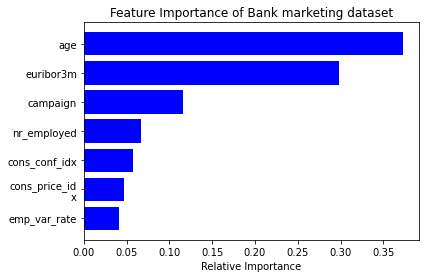

In [9]:
bank_features = bank.drop('y', axis = 1)
features_ex = bank_features.columns
importances_ex = forest_ex.feature_importances_
indices_ex = np.argsort(importances_ex)[::-1]
top_indices_ex = indices_ex[0:10][::-1]
plt.figure(1)
plt.title('Feature Importance of Bank marketing dataset')
plt.barh(range(len(top_indices_ex)), importances_ex[top_indices_ex], color = 'b', align = 'center')
labels = features_ex[top_indices_ex]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices_ex)), labels)
plt.xlabel('Relative Importance')


#### Task 10
##### Create a gradient boosting classifier as `gbm_ex` with number of estimators set to 100, learning rate set to 1, max depth set to 1, and random state set to 1.
##### Fit the model to our training data.
#### Result:


In [10]:
# Save the parameters we will be using for our gradient boosting classifier.
gbm_ex = GradientBoostingClassifier(n_estimators = 100, 
                                    learning_rate = 1, 
                                    max_depth = 1,  
                                    random_state = 1)
# Fit the saved model to your training data.
gbm_ex.fit(X_train_ex, y_train_ex)


GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=1)

#### Task 11
##### Predict on the test data using our gbm classifier.
##### Print the first 5 predicted values.
#### Result:


In [11]:
# Predict on test data.
predicted_values_gbm_ex = gbm_ex.predict(X_test_ex)
print(predicted_values_gbm_ex[0:5,])


[0 0 0 0 0]


#### Task 12
##### Print the confusion matrix and accuracy score on the test data.
##### Print the training accuracy of gbm model.
#### Result:


In [12]:
# Take a look at test data confusion matrix.
conf_matrix_boosting_ex = metrics.confusion_matrix(y_test_ex, predicted_values_gbm_ex)
print(conf_matrix_boosting_ex)
# Compute test model accuracy score.
accuracy_gbm_ex = metrics.accuracy_score(y_test_ex, predicted_values_gbm_ex)
print('Accuracy of gbm on test data: ', accuracy_gbm_ex)
# Compute accuracy using training data.
train_accuracy_gbm_ex = gbm_ex.score(X_train_ex, y_train_ex)
print ("Train Accuracy:", train_accuracy_gbm_ex)


[[521   6]
 [ 55  18]]
Accuracy of gbm on test data:  0.8983333333333333
Train Accuracy: 0.8892857142857142


#### Task 13
##### Print the feature importance graph and print top 10 important predictors.
#### Result:


Text(0.5, 0, 'Relative Importance')

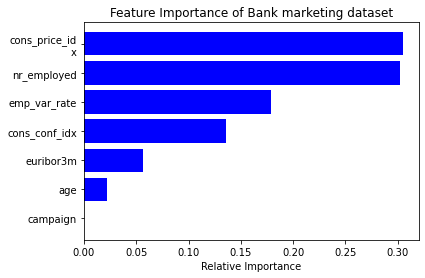

In [13]:
bank_features = bank.drop('y', axis = 1)
features_ex = bank_features.columns
importances_ex = gbm_ex.feature_importances_
indices_ex = np.argsort(importances_ex)[::-1]
top_indices_ex = indices_ex[0:10][::-1]
plt.figure(1)
plt.title('Feature Importance of Bank marketing dataset')
plt.barh(range(len(top_indices_ex)), importances_ex[top_indices_ex], color = 'b', align = 'center')
labels = features_ex[top_indices_ex]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices_ex)), labels)
plt.xlabel('Relative Importance')
